# Entender el objetivo y el dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Algunos pasos utiles para la limpieza de datos**


Antes de usar algún algoritmo de aprendizaje automático o un modelo estadístico, siempre tenemos que limpiar los datos.
 Ningún modelo crea resultados significativos con datos "sucios".
La limpieza o depuración de datos es el proceso de detectar y corregir (o eliminar) registros corruptos o inexactos de un conjunto de registros, tabla o base de datos y se refiere a la identificación de partes incompletas, incorrectas, inexactas o irrelevantes de los datos y luego reemplazar, modificar o eliminar los datos sucios.

 Ciertamente esta parte no es muy divertida y requiere mucho tiempo.


En el estado de Victoria, Australia se presentan accidentes de carros constantemente, el departamento de transporte en Victoria mantiene un record de cada accidente y este es guardado en una base de datos que se encuentra en la página web de Data en victoria y es pública para el uso de quien la necesite.

El objetivo es a partir del uso de los datos adecuados buscar en este Dataset los lugares donde se presentan más accidentes de carros y  así permitir al Departamento de Transporte de Victoria generar soluciones potenciales para evitar este tipo de accidentes en las carreteras. De este modo esta información será útil para la planeación de reformas en la carretera y así evitar los accidentes en los lugares que han sido recurrentes o implementar cierta señalización en esos lugares. 

El tipo de salida en este proceso KDD sería un pronóstico. Para lo cual podríamos citar ciertas aplicaciones:

*   La búsqueda del estado del conductor en el momento del accidente, si se encontraba sobrio o alcoholizado
*   La selección de los días donde son más incidentes los accidentes en carretera.
*   La búsqueda de los lugares donde hay una cantidad más grande de accidentes.
*   La búsqueda de cuantos accidentes fueron fatales


In [2]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# Informacion adicional

https://realpython.com/python-data-cleaning-numpy-pandas/



Leemos el fichero de fuente de datos, que previamente hemos importado al libro

In [24]:
# read the data
df = pd.read_csv('Road_Crashes_for_five_Years_Victoria.csv')


Comprobamos los tipos y la cantidad de instacias que tenemos

In [25]:
# shape and data types of the data
print(df.shape)
print(df.dtypes)

(75320, 65)
X                float64
Y                float64
OBJECTID           int64
ACCIDENT_NO       object
ABS_CODE          object
                  ...   
RMA               object
RMA_ALL           object
DIVIDED           object
DIVIDED_ALL       object
STAT_DIV_NAME     object
Length: 65, dtype: object


Comprobamos de todas las variables, que subconjunto son númericas. (Potencialmente no tenemos que cambiar nada de ellas)

In [26]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['X' 'Y' 'OBJECTID' 'NODE_ID' 'LONGITUDE' 'LATITUDE' 'VICGRID_X'
 'VICGRID_Y' 'TOTAL_PERSONS' 'INJ_OR_FATAL' 'FATALITY' 'SERIOUSINJURY'
 'OTHERINJURY' 'NONINJURED' 'MALES' 'FEMALES' 'BICYCLIST' 'PASSENGER'
 'DRIVER' 'PEDESTRIAN' 'PILLION' 'MOTORIST' 'UNKNOWN' 'PED_CYCLIST_5_12'
 'PED_CYCLIST_13_18' 'OLD_PEDESTRIAN' 'OLD_DRIVER' 'YOUNG_DRIVER'
 'UNLICENCSED' 'NO_OF_VEHICLES' 'HEAVYVEHICLE' 'PASSENGERVEHICLE'
 'MOTORCYCLE' 'PUBLICVEHICLE']


Hacemos lo mismo con las variables que no son númericas

In [27]:
# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)


['ACCIDENT_NO' 'ABS_CODE' 'ACCIDENT_STATUS' 'ACCIDENT_DATE'
 'ACCIDENT_TIME' 'ALCOHOLTIME' 'ACCIDENT_TYPE' 'DAY_OF_WEEK' 'DCA_CODE'
 'HIT_RUN_FLAG' 'LIGHT_CONDITION' 'POLICE_ATTEND' 'ROAD_GEOMETRY'
 'SEVERITY' 'SPEED_ZONE' 'RUN_OFFROAD' 'NODE_TYPE' 'LGA_NAME'
 'REGION_NAME' 'ALCOHOL_RELATED' 'DEG_URBAN_NAME' 'DEG_URBAN_ALL'
 'LGA_NAME_ALL' 'REGION_NAME_ALL' 'SRNS' 'SRNS_ALL' 'RMA' 'RMA_ALL'
 'DIVIDED' 'DIVIDED_ALL' 'STAT_DIV_NAME']


De estos resultados, aprendemos que el conjunto de datos tiene **75320** filas y **65** columnas. También identificamos si las características son variables numéricas o categóricas. Todas ellas son información útil.
Ahora podemos revisar la lista de tipos de datos "sucios" y arreglarlos uno por uno.





# Missing values

Tratar con datos/valores perdidos es una de las partes más difíciles pero comunes de la limpieza de datos. 
Mientras que muchos modelos pueden vivir con otros problemas de los datos, la mayoría de los modelos no aceptan datos faltantes.

**¿Cómo averiguarlo?**


Para este dataset vamos a usar dos técnicas para aprender más sobre los datos que faltan en nuestro conjunto de datos.

## Missing Data Heatmap
Cuando hay un número menor de características, podemos visualizar los datos que faltan a través del mapa de calor.

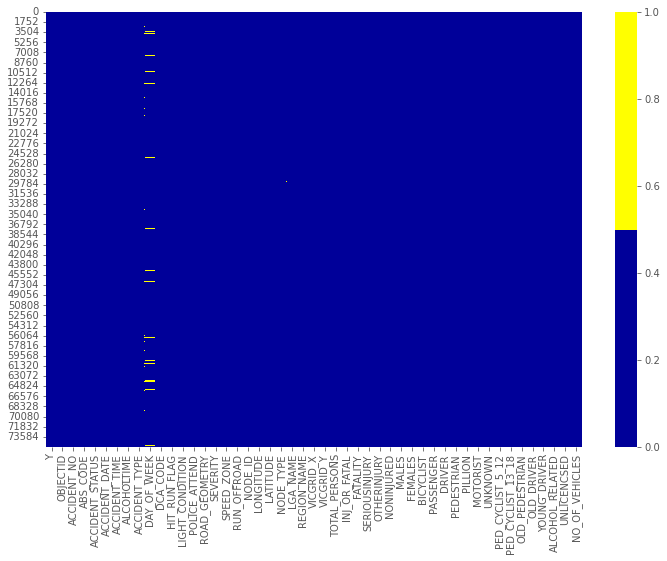

In [28]:
cols = df.columns[1:50] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

 
El eje horizontal muestra el nombre del atributo de entrada; el eje vertical muestra el número de observaciones/filas; el color amarillo representa los datos que faltan, mientras que el color azul, en caso contrario.
Por ejemplo, vemos que la característica *DAY_OF_WEEK* tiene valores perdidos en ciertas filas. Mientras que la característica *NODE_TYPE* sólo tiene pequeños valores perdidos alrededor de la fila 29784.



## Missing Data Percentage List
Cuando hay muchas características en el conjunto de datos, podemos hacer una lista de los % de datos que faltan para cada característica.

Puede ser mucho más útil que el anterior cuando tienes muchas características y muchos valores

In [8]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


X - 0%
Y - 0%
OBJECTID - 0%
ACCIDENT_NO - 0%
ABS_CODE - 0%
ACCIDENT_STATUS - 0%
ACCIDENT_DATE - 0%
ACCIDENT_TIME - 0%
ALCOHOLTIME - 0%
ACCIDENT_TYPE - 0%
DAY_OF_WEEK - 4%
DCA_CODE - 0%
HIT_RUN_FLAG - 0%
LIGHT_CONDITION - 0%
POLICE_ATTEND - 0%
ROAD_GEOMETRY - 0%
SEVERITY - 0%
SPEED_ZONE - 0%
RUN_OFFROAD - 0%
NODE_ID - 0%
LONGITUDE - 0%
LATITUDE - 0%
NODE_TYPE - 0%
LGA_NAME - 0%
REGION_NAME - 0%
VICGRID_X - 0%
VICGRID_Y - 0%
TOTAL_PERSONS - 0%
INJ_OR_FATAL - 0%
FATALITY - 0%
SERIOUSINJURY - 0%
OTHERINJURY - 0%
NONINJURED - 0%
MALES - 0%
FEMALES - 0%
BICYCLIST - 0%
PASSENGER - 0%
DRIVER - 0%
PEDESTRIAN - 0%
PILLION - 0%
MOTORIST - 0%
UNKNOWN - 0%
PED_CYCLIST_5_12 - 0%
PED_CYCLIST_13_18 - 0%
OLD_PEDESTRIAN - 0%
OLD_DRIVER - 0%
YOUNG_DRIVER - 0%
ALCOHOL_RELATED - 0%
UNLICENCSED - 0%
NO_OF_VEHICLES - 0%
HEAVYVEHICLE - 0%
PASSENGERVEHICLE - 0%
MOTORCYCLE - 0%
PUBLICVEHICLE - 0%
DEG_URBAN_NAME - 0%
DEG_URBAN_ALL - 0%
LGA_NAME_ALL - 0%
REGION_NAME_ALL - 0%
SRNS - 70%
SRNS_ALL - 70%
RMA - 7%
RMA

Esto produce una lista abajo que muestra el porcentaje de valores faltantes para cada una de las características.
Específicamente, vemos que a la característica *SRNS* y *SRNS_ALL* le falta el 70%, mientras que  *RMA*, *RMA_ALL*, *DIVIDED*, *DIVIDED_ALL* le falta el 7% y el ultimo valor *DAY_OF_WEEK* solo le falta el 4%.
 Esta lista es un resumen útil que puede complementar la visualización del mapa de calor.

## Dejar o no dejar la característica

Similar a la Solución 1, sólo lo hacemos cuando estamos seguros de que esta característica no proporciona información útil.


Por ejemplo, de la lista de % de datos faltantes, notamos que *SRNS*, *SRNS_ALL* tiene un alto porcentaje de valor faltante del 70%. Podemos eliminar toda la característica.

In [9]:

cols_to_drop = ['SRNS','SRNS_ALL']
df_less_hos_beds_raion = df.drop(cols_to_drop, axis=1)
print(df_less_hos_beds_raion.shape)

(75320, 63)


Aqui comprobamos que tenemos las mimas instancias que al principio, porque lo único que hemos hecho es eliminar dos atributos por lo tanto se muestran 63 y no 65.

# Datos innecesarios

Después de todo el trabajo realizado para los datos que faltan y los valores atípicos, veamos los datos innecesarios, que son más sencillos.

Todos los datos que se introducen en el modelo deberían servir para el propósito del proyecto. 
Los datos innecesarios son cuando los datos no añaden valor. 

Hay  tres tipos principales de datos innecesarios debido a diferentes razones.

## Tipo innecesario 1: Desinformativo / Repetitivo

A veces una característica no es informativa porque tiene demasiadas filas que tienen el mismo valor.

**¿Cómo averiguarlo?**

Podemos crear una lista de características con un alto porcentaje del mismo valor.

Por ejemplo, especificamos a continuación para mostrar las características con más del 95% de filas que tienen el mismo valor.

In [10]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

ACCIDENT_STATUS: 97.74164%
Finished            73619
Private Property     1216
Unfinished            447
Discarded              20
Reopened               18
Name: ACCIDENT_STATUS, dtype: int64

FATALITY: 97.91158%
0    73747
1     1501
2       62
3        7
4        2
6        1
Name: FATALITY, dtype: int64

PILLION: 99.46628%
0    74918
1      397
2        5
Name: PILLION, dtype: int64

UNKNOWN: 95.47265%
0     71910
1      2935
2       365
3        66
4        23
6         6
5         4
8         2
7         2
52        1
49        1
36        1
19        1
13        1
11        1
10        1
Name: UNKNOWN, dtype: int64

PED_CYCLIST_5_12: 99.12772%
0    74663
1      635
2       18
3        3
8        1
Name: PED_CYCLIST_5_12, dtype: int64

PED_CYCLIST_13_18: 98.50637%
0    74195
1     1097
2       24
4        2
5        1
3        1
Name: PED_CYCLIST_13_18, dtype: int64

OLD_PEDESTRIAN: 97.70844%
0    73594
1     1677
2       48
3        1
Name: OLD_PEDESTRIAN, dtype: int64

ALCOHOL_

Podemos examinar estas variables una por una para ver si son informativas o no. 

**¿Qué hacer?**

Necesitamos entender las razones detrás de la característica repetitiva. Cuando son genuinamente desinformativas, podemos descartarlas en este caso nuestras caracteristicas son informativas ya que los valores que se estan repitiendo de hecho hacen parte del dataset para dar la informacion necesaria del estudio.



## Tipo innecesario 2: Duplicados

Los datos duplicados son cuando existen copias de la misma observación.
Hay dos tipos principales de datos duplicados.

In [23]:
cols_to_drop = ['SRNS','SRNS_ALL','VICGRID_X','VICGRID_Y','DEG_URBAN_ALL','DIVIDED','DIVIDED_ALL']
df_caracteristicas = df.drop(cols_to_drop, axis=1)
print(df_caracteristicas.shape)

(75320, 59)


En este apartado podemos apreciar la diferencia de caracteristicas que teniamos al principio del dataset de **65** caracteristicas hemos disminuido ha **58** y aun asi no hemos considerado ciertas variables que han podido ser removidas del dataset pero he decidido dejarlas para los estudios futuros o estudios mas especificos.

### TRANSFORMACION DE DATOS

**¿Cómo hacerlo?**

A veces es mejor transformar ciertos datos para que sea mas facil analizarlos y poder realizar los algoritmos pertinentes.

Por ejemplo, una de las caracteristicas que queremos analizar es "ACCIDENT_TIME" la cual me da la hora del accidente pero hemos notado que quienes han hecho la insercion de datos no ingresaron la fecha adecuada en el csv file se puede apreciar que los valores ingresados son erroneos ya que se registran como *1899/12/30* y solamente la hora es correcta por lo cual hemos extraido la hora y luego hemos reemplazado esa nueva columna con esa hora extraida



In [22]:
date_time = df['ACCIDENT_TIME']
type(date_time[0])


date_time
hora = date_time.str.extract('((?:[01]\d|2[0-3]):[0-5]\d:[0-5]\d)')
df['ACCIDENT_HOUR'] = hora
df['ACCIDENT_TIME'] = df['ACCIDENT_HOUR'].values
print(df['ACCIDENT_TIME'])

0        07:00:00
1        09:55:00
2        21:50:00
3        06:00:00
4        15:50:00
           ...   
75315    13:00:00
75316    17:30:00
75317    15:30:00
75318    08:50:00
75319    12:15:00
Name: ACCIDENT_TIME, Length: 75320, dtype: object


Como podemos ver anteriormente hemos reemplazado la caracteristica con el nuevo valor 


###INFORMACION ADICIONAL

1. Acontinuacion vamos a encontrar la moda en las siguientes caracteristicas:

*DAY_OF_WEEK* la moda permite conocer el dia donde se han producido mas accidentes

*REGION_NAME* el valor de la moda nos dira en que parte de Victoria, Australia se presentan mas accidentes 


In [13]:
Moda_dia_semana = df['DAY_OF_WEEK'].mode()
Moda_region = df['REGION_NAME'].mode()
print("El dia donde se producen mas accidentes es:",Moda_dia_semana[0])
print("la region donde se producen mas accidentes es:",Moda_region[0])



El dia donde se producen mas accidentes es: Friday
la region donde se producen mas accidentes es: METROPOLITAN SOUTH EAST REGION


Despues de haber calculado la moda para estas dos caracteristicas podemos encontrar que el dia donde se producen mas accidentes es **FRIDAY** con esta informacion podemos brindar ese conocimiento extraido del dataset para brindar un analisis y proporner soluciones como implementar un nuevo limite de velocidad los dias viernes en las autopistas mas concurridas o en las region donde se producen mas accidentes que tambien ha sido calculada mediante la caracteristica **REGION_NAME** y esta region seria *METROPOLITAN SOUTH EAST REGION* 

2. Numero total de accidentes fatales en los ultimos cinco a;os para encontrar este valor vamos a usar la caracteristica *FATALITY* y hacer una sumatoria de los valores de los records ingresados

In [14]:
Numero_total_muertos = df['FATALITY'].sum()
print("El numero total de accidentes fatales es:",Numero_total_muertos)

El numero total de accidentes fatales es: 1660


3. En esta seccion vamos a mostrar los numeros totales de accidentes que involucraron alcohol para esto en el dataset una de las caracteristicas llamada *ALCOHOLTIME* ha sido ingresada con dos valores *Yes* y *No* mediente un ciclo for y un conteo podemos encontrar dichos valores tanto para accidentes con alcohol como para accidentes sin alcohol.

In [20]:
conteo=0
conteon=0
for col in df['ALCOHOLTIME']:
    if col == "Yes":
      conteo = 1+conteo
    else: conteon = 1+conteon
alcohol = round((conteo/(conteo+conteon))*100,2)
sinalcohol = round((conteon/(conteo+conteon))*100,2)
print("El numero de accidentes que involucraron alcoho son:",conteo)
print("El numero de accidentes que no involucraron alcohol son:",conteon)
print("Numero Total de Accidentes:",(conteo+conteon))
print("Porcentaje de accidentes relacionados con alcohol:",alcohol,'%')
print("Porcentaje de accidentes  no relacionados con alcohol:",sinalcohol,'%')


El numero de accidentes que involucraron alcoho son: 26605
El numero de accidentes que no involucraron alcohol son: 48715
Numero Total de Accidentes: 75320
Porcentaje de accidentes relacionados con alcohol: 35.32 %
Porcentaje de accidentes  no relacionados con alcohol: 64.68 %


Despues de analizar esta caracteristica podemos apreciar que aun ocurren una cantidad elevada de accidentes con alcohol involucrado aproximadamente un 35.32% por lo tanto se deben incluir algunas recomendaciones para que el publico no consuma alcohol si va a manejar tal vez anuncion mas repetitivos por television.